In [21]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Conv1D, GlobalMaxPooling1D, LSTM, SimpleRNN
from keras.datasets import imdb

## Link to my blog:
https://medium.com/@chuqing_wang/natural-language-processing-on-text-classification-bda9afa063a5

In [17]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

x_train = sequence.pad_sequences(x_train, maxlen=400)
x_test = sequence.pad_sequences(x_test, maxlen=400)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
x_train shape: (25000, 400)
x_test shape: (25000, 400)


## Using Convolution1D

In [18]:
model = Sequential()

model.add(Embedding(5000,
                    50,
                    input_length=400))
model.add(Dropout(0.25))

#Convolution1D, which will learn filters
model.add(Conv1D(250,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
#max pooling:
model.add(GlobalMaxPooling1D())

#hidden layer:
model.add(Dense(250))
model.add(Dropout(0.25))
model.add(Activation('relu'))

#output layer:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 250)               0         
__________

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 115s 5ms/step - loss: 0.4137 - acc: 0.7904 - val_loss: 0.3397 - val_acc: 0.8549
Epoch 2/10
25000/25000 [==============================] - 116s 5ms/step - loss: 0.2414 - acc: 0.9022 - val_loss: 0.2696 - val_acc: 0.8856
Epoch 3/10
25000/25000 [==============================] - 114s 5ms/step - loss: 0.1762 - acc: 0.9323 - val_loss: 0.2703 - val_acc: 0.8910
Epoch 4/10
25000/25000 [==============================] - 114s 5ms/step - loss: 0.1317 - acc: 0.9518 - val_loss: 0.3033 - val_acc: 0.8878
Epoch 5/10
25000/25000 [==============================] - 117s 5ms/step - loss: 0.0949 - acc: 0.9652 - val_loss: 0.3520 - val_acc: 0.8816
Epoch 6/10
25000/25000 [==============================] - 115s 5ms/step - loss: 0.0678 - acc: 0.9765 - val_loss: 0.3696 - val_acc: 0.8820
Epoch 7/10
25000/25000 [==============================] - 117s 5ms/step - loss: 0.0591 - acc: 0.9785 - val_loss: 0.4175 - 

In [26]:
score = model.evaluate(x_test, y_test, verbose = 1)
score

25000/25000 [==============================] - 15s 619us/step


[0.478515706602335, 0.88304000000000005]

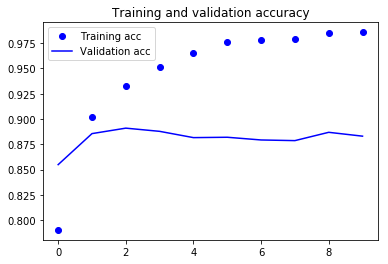

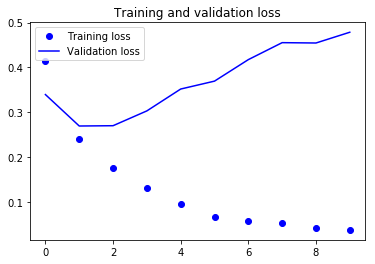

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using RNN

In [23]:
model_rnn = Sequential()

model_rnn.add(Embedding(5000,
                    50,
                    input_length=400))
model_rnn.add(Dropout(0.25))

#SimpleRNN
model_rnn.add(SimpleRNN(50))

#hidden layer:
model_rnn.add(Dense(250))
model_rnn.add(Dropout(0.25))
model_rnn.add(Activation('relu'))

#output layer:
model_rnn.add(Dense(1))
model_rnn.add(Activation('sigmoid'))

model_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 250)               12750     
_________________________________________________________________
dropout_7 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
__________

In [24]:
model_rnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 91s 4ms/step - loss: 0.5866 - acc: 0.6596 - val_loss: 0.3968 - val_acc: 0.8336
Epoch 2/10
25000/25000 [==============================] - 89s 4ms/step - loss: 0.4311 - acc: 0.8012 - val_loss: 0.5126 - val_acc: 0.7399
Epoch 3/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.3966 - acc: 0.8214 - val_loss: 0.4047 - val_acc: 0.8410
Epoch 4/10
25000/25000 [==============================] - 92s 4ms/step - loss: 0.4114 - acc: 0.8123 - val_loss: 0.4080 - val_acc: 0.8355
Epoch 5/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.3289 - acc: 0.8652 - val_loss: 0.5182 - val_acc: 0.7969
Epoch 6/10
25000/25000 [==============================] - 91s 4ms/step - loss: 0.4165 - acc: 0.8074 - val_loss: 0.4272 - val_acc: 0.8327
Epoch 7/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.3341 - acc: 0.8656 - val_loss: 0.4161 - val_acc

In [25]:
score = model_rnn.evaluate(x_test, y_test, verbose = 1)
score

25000/25000 [==============================] - 21s 822us/step


[0.55519029062271119, 0.72951999999999995]

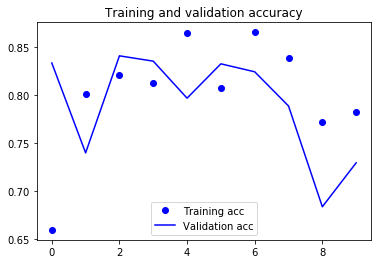

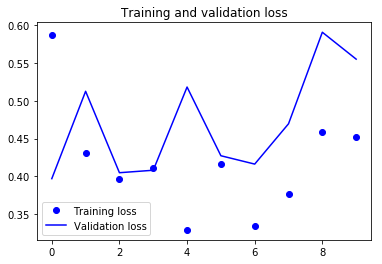

In [27]:
import matplotlib.pyplot as plt

acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()